In [41]:
# numpy é usada para manipulação de arrays numéricos
import numpy as np

#pandas é usados para manipulação de data frames
import pandas as pd

# Tensorflow é a implementação padrão dos modelos de DL, ele é base do Keras
from tensorflow import keras
from keras.utils import to_categorical

# objetos do keras para criar arquiteturas de DL
from keras.models import Sequential
from keras.layers import Dense

# para geração de gráficos
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [42]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [43]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['target'] = pd.Series(iris['target'], name = 'target_values')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
# Define the features and target
X = df.loc[:, df.columns != 'target']
Y = df['target']

In [45]:
# Split the data into training and testing sets stratified by multiple columns
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42,
    stratify=Y
)

In [46]:
# Dimensões do dataset [treino e teste]
# Treino = (x_train, y_train)
print("* x_train: " + str(type(X_train)) + " com " + str(X_train.shape))
print("* y_train: " + str(type(y_train)) + " com " + str(y_train.shape))

# Teste = (x_test, y_test)
print("* x_test:  " + str(type(X_test)) + " com " + str(X_test.shape))
print("* y_test:  " + str(type(y_test)) + " com " + str(y_test.shape))

* x_train: <class 'pandas.core.frame.DataFrame'> com (105, 4)
* y_train: <class 'pandas.core.series.Series'> com (105,)
* x_test:  <class 'pandas.core.frame.DataFrame'> com (45, 4)
* y_test:  <class 'pandas.core.series.Series'> com (45,)


In [47]:
#  Create categorical labels

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)


In [48]:
# Verificando as dimensões dos conjuntos
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (105, 4)
y_train: (105,)
X_test: (45, 4)
y_test: (45,)


In [49]:
# Vendo o dataset como um data frame
pd.DataFrame(X_train)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
19,5.1,3.8,1.5,0.3
143,6.8,3.2,5.9,2.3
99,5.7,2.8,4.1,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
79,5.7,2.6,3.5,1.0
33,5.5,4.2,1.4,0.2
94,5.6,2.7,4.2,1.3


In [53]:
# Definindo uma MLP

#MLP é um modelo de rede neura sequencial
mlpModel = Sequential()
mlpModel.add(Dense(10, activation = "sigmoid", input_shape=(4, )))
mlpModel.add(Dense(3, activation = "sigmoid"))

# imprime o modelo, para verificarmos a arquitetura
mlpModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                50        
                                                                 
 dense_9 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Aqui especificamos como será o processo de treinamento do modelo
# Nós vamos usar:
#    - SGD: algoritmo de gradiente descendente para treinar a rede
#    - binary crossentropy: entropia binária cruzada como medida de erro (loss),
#         que vai ser minimizada entre as épocas
#.   - accuracy: acurácia do modelo em cada época
mlpModel.compile(
    loss='binary_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

In [56]:
# Esse é o setup experimental para execução do treinamento da rede
# o método fit chama o treinamento da rede neural
#     - X_train: é o conjunto de treinamento
#     - y_train: são os rótulos do conjunto de treinamento
#     - epochs: quantidade de épocas que a rede irá treinar
#     - batch_size: quantidade de exemplos treinados em lote, para gerar um ajuste de pesos

history = mlpModel.fit(
    X_train, train_labels,
    epochs = 50,
    batch_size = 2,
    verbose=2
)

Epoch 1/50
53/53 - 1s - loss: 0.3622 - accuracy: 0.8286 - 984ms/epoch - 19ms/step
Epoch 2/50
53/53 - 0s - loss: 0.3609 - accuracy: 0.8476 - 122ms/epoch - 2ms/step
Epoch 3/50
53/53 - 0s - loss: 0.3598 - accuracy: 0.8476 - 87ms/epoch - 2ms/step
Epoch 4/50
53/53 - 0s - loss: 0.3586 - accuracy: 0.8762 - 75ms/epoch - 1ms/step
Epoch 5/50
53/53 - 0s - loss: 0.3575 - accuracy: 0.8571 - 82ms/epoch - 2ms/step
Epoch 6/50
53/53 - 0s - loss: 0.3564 - accuracy: 0.8286 - 69ms/epoch - 1ms/step
Epoch 7/50
53/53 - 0s - loss: 0.3552 - accuracy: 0.8476 - 78ms/epoch - 1ms/step
Epoch 8/50
53/53 - 0s - loss: 0.3540 - accuracy: 0.8381 - 79ms/epoch - 1ms/step
Epoch 9/50
53/53 - 0s - loss: 0.3531 - accuracy: 0.8571 - 69ms/epoch - 1ms/step
Epoch 10/50
53/53 - 0s - loss: 0.3520 - accuracy: 0.8286 - 73ms/epoch - 1ms/step
Epoch 11/50
53/53 - 0s - loss: 0.3507 - accuracy: 0.8095 - 85ms/epoch - 2ms/step
Epoch 12/50
53/53 - 0s - loss: 0.3498 - accuracy: 0.8381 - 75ms/epoch - 1ms/step
Epoch 13/50
53/53 - 0s - loss: 0.3

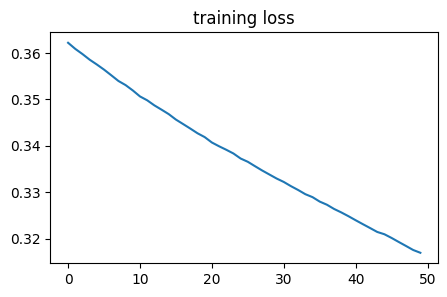

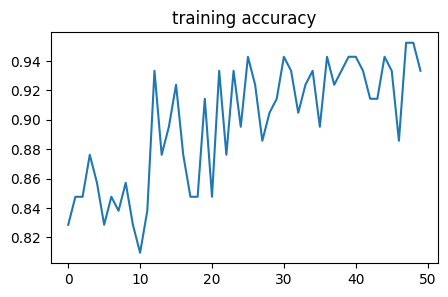

In [57]:
#Visualizando as curvas de erro e acurácia
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('training loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('training accuracy');

In [59]:
# Avaliando o modelo treinado no conjunto de testes
scores = mlpModel.evaluate(X_test, test_labels, verbose=2)
print("%s: %.2f%%" % (mlpModel.metrics_names[1], scores[1]*100))

2/2 - 0s - loss: 0.3187 - accuracy: 0.8667 - 235ms/epoch - 117ms/step
accuracy: 86.67%
